In [1]:
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

**TP 1 Notions de loi jointe, marginales et probabilités conditionnelles**


**Exercice 1:** (génération de dataset jouet)
Ecrire une fonction `2_bosses` qui prend en dimension 2 comme paramètres deux points (les moyennes), deux matrices de covariance et un entier n (nombre d'échantillons dans le dataset) et retourne n échantillons tirés selon la mixture de gaussiennes correspondante .

In [2]:
def deux_bosses(mean_1, mean_2, cov_1, cov_2, n):
    data_1 = np.random.multivariate_normal(mean_1, cov_1, size=n//2)
    data_2 = np.random.multivariate_normal(mean_2, cov_2, size=n//2)
    return np.concatenate((data_1, data_2))

**Exercice 2:** (visualisation)
Echantillonner 300 points et les représenter en 2D.

(2000, 2)


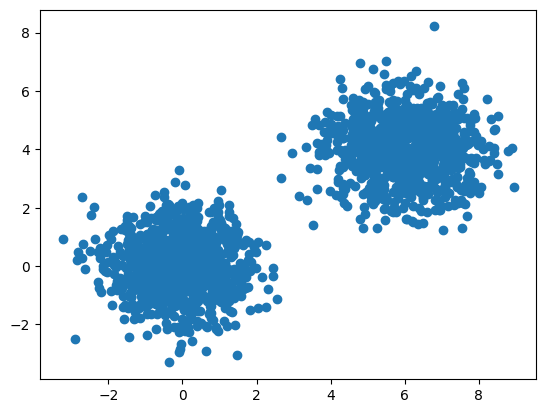

In [3]:
samples = deux_bosses([0, 0], [6, 4], [[1, 0], [0, 1]], [[1, 0], [0, 1]], 2000)
print(samples.shape)
plt.scatter(samples[:,0], samples[:,1])

La suite du TP se base sur les notions de densité de probabilité expliquées **[ici.](https://github.com/SHI-Yu-Zhe/generative-modeling-explained)**

**Exercice 3:** (fonction de densité jointe associée à un nuage de point) 
Ecrire une fonction `estime_densite_loi_jointe(nuage,eps)` qui prend comme paramètres un nuage de points `nuage`, un nombre positif `eps` et retourne une fonction `P_xy(p)` qui donne une approximation de la densité de la loi de probabilité jointe en le point `p` dans $R^2$.

In [4]:
eps = 0.5 # On choisit ici arbitrairement des boites/tranches de taille 0.5

def points_boite(nuage, point, eps):
    return nuage[(point[0] <= nuage[:,0]) & (nuage[:,0] <= point[0]+eps) & (point[1] <= nuage[:,1]) & (nuage[:,1] <= point[1]+eps)]

def estime_densite_loi_jointe(nuage, eps):
    def P_xy(p):
        return len(points_boite(nuage, p, eps)) / len(nuage)
    return P_xy

loi_jointe = estime_densite_loi_jointe(samples, eps) 
print(loi_jointe([0, 0]))

0.0185


**Exercice 4:** (visualisation)
Faire une representation graphique dans $R^3$ du graphe de l'estimation de la densité  de la loi jointe associée au nuage de point produit à la question 2.

In [5]:
xy_min = -4
xy_max = 10
n_points = int((xy_max - xy_min) / eps)
points_X = np.linspace(xy_min, xy_max, n_points, endpoint=False)
points_Y = np.linspace(xy_min, xy_max, n_points, endpoint=False)
X,Y = np.meshgrid(points_X, points_Y)
points = np.column_stack([X.ravel(), Y.ravel()]) # Permet d'avoir la sortie de meshgrid sous la forme d'une liste de points (liste de couples)
Z = [loi_jointe(point) for point in points]
print(np.sum(Z)) # La somme des lois jointes doit être égale à 1
Z = np.reshape(Z, (n_points,n_points))

1.0


Text(0.5, 0.5, 'y')

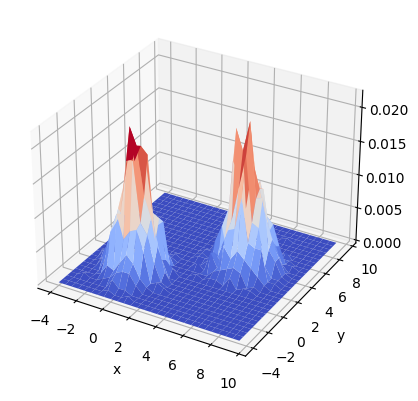

In [6]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.set_xlabel('x')
ax.set_ylabel('y')

**Exercice 5:** (marginalisation)
Ecrire une fonction `marginale_x(nuage,eps)` qui prend comme paramètres un nuage de points `nuage`, un nombre positif `eps` et retourne une fonction `P_x(x)` qui donne une approximation de la densité en `x` de la marginale de la loi de probabilité jointe dans $R^2$.

In [7]:
def points_bande_x(nuage, x, eps):
    return nuage[(x <= nuage[:,0]) & (nuage[:,0] < x+eps)]

def marginale_x(nuage, eps):
    def P_x(p):
        return len(points_bande_x(nuage, p, eps)) / len(nuage)
    return P_x

def points_bande_y(nuage, y, eps):
    return nuage[(y <= nuage[:,1]) & (nuage[:,1] < y+eps)]

def marginale_y(nuage, eps):
    def P_y(p):
        return len(points_bande_y(nuage, p, eps)) / len(nuage)
    return P_y

marg_x = marginale_x(samples, eps)
marg_y = marginale_y(samples, eps)

**Exercice 6:** (visualisation de la marginalisation)
Faire une representation graphique dans $R^3$ du graphe de l'estimation de la densité  de la loi jointe associée au nuage de point produit à la question 2 et de ses marginales, dans l'esprit de l'image suivante.

![image info](./MultivariateNormal.png)

In [8]:
liste_marg_x = [marg_x(point) for point in points_X]
liste_marg_y = [marg_y(point) for point in points_Y]

# On calcule la somme des marginales de chaque tranche, qui doit être égale à 1
print(sum(liste_marg_x))
print(sum(liste_marg_y))

0.9999999999999998
0.9999999999999997


Text(0.5, 0.5, 'y')

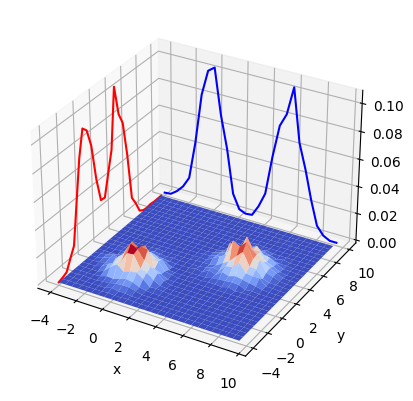

In [11]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.plot(points_X, liste_marg_x, zs=10, zdir='y', color='blue')
ax.plot(points_Y, liste_marg_y, zs=-4, zdir='x', color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')

**Exercice 7:** (loi conditionelle)
Ecrire une fonction `conditionne_y(nuage,eps,y)` qui prend comme paramètres un nuage de points `nuage`, un nombre positif `eps` et retourne une fonction `P_x|y(x)` qui donne une approximation de la densité de la probabilité conditionnelle de `x` conditionée par `y`.

In [10]:
def conditionne_y(nuage, eps, y):
    def P_x_barre_y(x):
        return loi_jointe([x,y]) / marg_x(x)
    return P_x_barre_y

cond_y = conditionne_y(samples, eps, 0)
print(cond_y(1))

0.10638297872340426
